# 파일다운로드
이미지, 동영상, 파일...


### download 폴더를 만들어서 진행

In [2]:
import os
dirName = 'download'

if not os.path.exists(dirName):
    os.mkdir(dirName)
    print('Directory',dirName,"Created")
else:     
    print('Directory',dirName,"already exists")

Directory download Created


### 다운로드 해볼 예제 소스

In [4]:
 # 예제에 사용한 미디어 출처
 #  https://www.w3schools.com/html/html5_video.asp
 #  https://www.w3schools.com/html/html5_audio.asp
 #  https://www.w3schools.com/howto/howto_css_fullscreen_video.asp
 
 # 예제에 사용한 이미지 출처
 # 	https://www.w3schools.com/css/css_image_gallery.asp




In [5]:
# URL 에 파일명이 있는 형태
imgUrls = [
    "https://www.w3schools.com/css/img_5terre.jpg",
    "https://www.w3schools.com/css/img_forest.jpg", 
    "https://www.w3schools.com/css/img_lights.jpg",
    "https://www.w3schools.com/css/img_mountains.jpg"
]

movUrls = [
    "https://www.w3schools.com/html/movie.mp4",   # 영상
    "https://www.w3schools.com/howto/rain.mp4",
    "https://www.w3schools.com/html/mov_bbb.mp4",
    "https://www.w3schools.com/html/horse.ogg"    # 음성   
]


In [6]:
import requests

In [10]:
# 이미지와 같은 이진데이터를 request 할 시 stream = True 옵션 추가
response = requests.get(imgUrls[0],stream = True)
response

<Response [200]>

In [ ]:
#response.text  # 이진데이터는 텍스트로 볼 수 없다.

In [14]:
response.content
len(response.content) # 용량, 단위는 바이트

149372

In [34]:
if response.status_code == 200:
    with open(f'./{dirName}/test.jpg', 'wb') as f:
        f.write(response.content)

# URL에 파일이름이 있다면 그 이름으로 다운로드 받기

In [21]:
import urllib.parse as urlparser

In [22]:
url = imgUrls[0]
disassembled = urlparser.urlparse(url)
disassembled

ParseResult(scheme='https', netloc='www.w3schools.com', path='/css/img_5terre.jpg', params='', query='', fragment='')

In [23]:
disassembled.path

'/css/img_5terre.jpg'

#### os.path 를 사용하여 경로에서 파일명 분리

In [25]:
from os.path import basename, splitext, split 

In [30]:
filename = basename(disassembled.path)
filename

'img_5terre.jpg'

In [31]:
splitext(filename) # 파일명과 확장자 분리

('img_5terre', '.jpg')

In [33]:
split(disassembled.path) # path와 파일이 분리

('/css', 'img_5terre.jpg')

In [35]:
with open(f'./download/{filename}','wb') as f:
    f.write(response.content)

### jupyter notebook 에서 이미지 확인 가능

In [50]:
from IPython.display import Image

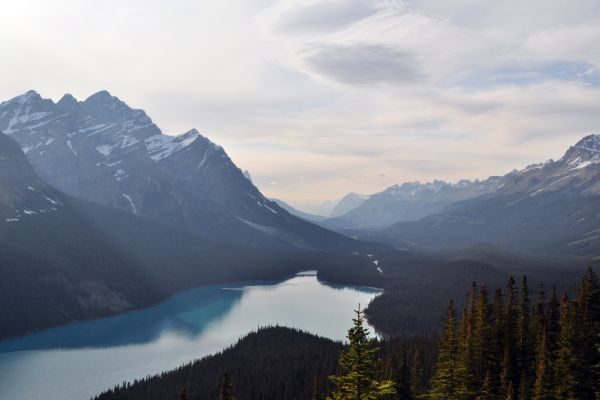

In [53]:
Image(f'./download/{filename}')

# ImgUrl. movUrl 다운로드 하기(완성)

In [47]:
for url in movUrls + imgUrls:
    disassembled = urlparser.urlparse(url)
    filename = basename(disassembled.path)
    print('다운로드:',url,'->',filename)
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(f'./download/{filename}','wb') as f:
             f.write(response.content)

다운로드: https://www.w3schools.com/html/movie.mp4 -> movie.mp4
다운로드: https://www.w3schools.com/howto/rain.mp4 -> rain.mp4
다운로드: https://www.w3schools.com/html/mov_bbb.mp4 -> mov_bbb.mp4
다운로드: https://www.w3schools.com/html/horse.ogg -> horse.ogg
다운로드: https://www.w3schools.com/css/img_5terre.jpg -> img_5terre.jpg
다운로드: https://www.w3schools.com/css/img_forest.jpg -> img_forest.jpg
다운로드: https://www.w3schools.com/css/img_lights.jpg -> img_lights.jpg
다운로드: https://www.w3schools.com/css/img_mountains.jpg -> img_mountains.jpg
